# Tianqi  Wang

## Question A

In [62]:
import numpy as np

In [495]:
def REF_basic(A):
    # Coerce the data type to be float so to make fraction computation
    B=A.copy().astype(np.float) 
    m,n = B.shape
    # Make sure the dimension of input to be n × (n+1), othersie raise error
    if m!=n-1: 
        raise TypeError('This is not a n*(n+1) model')
    for i in range(m): # Iterate from the first column
        # Make sure there is a pivot for each column
        if np.max(abs(B[i:,i])) == 0: 
            raise TypeError('Matrix is not invertible')
        if B[i,i] == 0:# Swap the row to make there is a leading number
            change = np.argmax(abs(B[i:,i]))+i 
            temp = B[i].copy()
            B[i] = B[change]
            B[change]=temp
        for j in range(i+1,m):
            B[j]=B[j]-B[i]*B[j,i]/B[i,i] # Do the forward elimination
    return B


#### (a) Test the function in HW1-7

In [496]:
test1=np.array([[2,2,2,0],[-2,5,2,1],[8,1,4,-1]])
REF_basic(test1)

TypeError: Matrix is not invertible

#### (b) Test the function in the given array

In [497]:
test2=np.array([[1,2,3,4,6],[1,2,5,2,-2],[1,1,5,5,1],[1,4,1,5,0]])
print(test2)
print(REF_basic(test2))

[[ 1  2  3  4  6]
 [ 1  2  5  2 -2]
 [ 1  1  5  5  1]
 [ 1  4  1  5  0]]
[[ 1.   2.   3.   4.   6. ]
 [ 0.   2.  -2.   1.  -6. ]
 [ 0.   0.   1.   1.5 -8. ]
 [ 0.   0.   0.  -5.   8. ]]


## Question B

In [528]:
# Define the function BackSub
def BackSub(A,b):
    m,n = A.shape
    if len(A.shape)!=2: # A must be a matrix
        raise TypeError('Input is not a matrix')
    # A must be a square matrix
    if m != n: 
        raise TypeError('Input is not a square matrix')
    # A must be an upper triangle square matrix
    if np.allclose(A, np.triu(np.round(A,6))) == 0: 
        raise TypeError('Input is not an upper triangle square matrix')    
    if np.linalg.det(A)==0: # A's diagonals are all nonzero
        raise TypeError('Input is not an invertible matrix')
    if len(b.shape)!=1: # b must be a vector
        raise TypeError('The second input is not a vector')
    if b.shape[0]!=A.shape[0] :# dimension of b must equal to a
        raise TypeError('Two inputs do not match')
    else:
        # Start the backwards elimination from the last column
        for i in range(len(b)-1,-1,-1): 
            b[i]=b[i]/A[i,i]
            A[i,i]=1
            # In each column, do the elimination from the diagnal upwards
            for j in range(i-1,-1,-1): 
                b[j]=b[j]-A[j,i]*b[i]
                A[j,i]=0
    return b

def Mysolve(A,b):
    row,column = A.shape
    B=np.column_stack((A,b))
    C=REF_basic(B)
    D = C[:,:column]
    e = C[:,column]
    return BackSub(D,e)
    

Randomly generate some linear systems to test the function `Mysolve`

Test 1

In [499]:
import random
test1 = np.array(np.random.randint(0,10,9))
test1 = test1.reshape(3,3)
b1 = np.array(np.random.randint(0,10,3))
print (test1)
print (b1)

[[2 6 6]
 [8 9 0]
 [0 5 5]]
[3 9 8]


In [500]:
Mysolve(test1,b1)

array([-3.3       ,  3.93333333, -2.33333333])

In [501]:
np.linalg.solve(test1,b1)

array([-3.3       ,  3.93333333, -2.33333333])

Test 2

In [502]:
np.random.seed(222)
test2 = np.array(np.random.randint(0,10,16))
test2 = test2.reshape(4,4)
b2 = np.array(np.random.randint(0,10,4))
print (test2)
print (b2)

[[6 3 2 5]
 [6 8 8 4]
 [7 8 8 0]
 [4 3 3 2]]
[1 9 9 8]


In [503]:
Mysolve(test2,b2)

array([  2.46666153, -14.81664357,  13.78331408,   0.61666667])

In [504]:
np.linalg.solve(test2,b2)

array([  2.46666667, -14.81666667,  13.78333333,   0.61666667])

Test 3

In [505]:

test3 = np.array(np.random.randint(0,10,25))
test3 = test3.reshape(5,5)
b3 = np.array(np.random.randint(0,10,5))
print (test3)
print (b3)
print(Mysolve(test3,b3))
print(np.linalg.solve(test3,b3))

[[0 3 7 7 7]
 [9 4 5 9 4]
 [9 5 5 4 8]
 [4 8 0 4 0]
 [0 1 3 7 5]]
[1 2 6 4 2]
[ 0.15808574  0.42805316 -0.90165032 -0.01419142  0.87524752]
[ 0.15808581  0.42805281 -0.90165017 -0.01419142  0.87524752]


In [506]:
Mysolve(test3,b3)

array([ 0.15808574,  0.42805316, -0.90165032, -0.01419142,  0.87524752])

In [507]:
np.linalg.solve(test3,b3)

array([ 0.15808581,  0.42805281, -0.90165017, -0.01419142,  0.87524752])

In all three tests, my function generates the same results as np.linalg.solve does.

## Quesiton C

Test the complexity of the function.

In [529]:
import time
np.random.seed(12321)
k=range(11)
T=[]
for i in k:
    test = np.array(np.random.randint(0,10,(2**i)**2))
    test = test.reshape(2**i,2**i)
    b = np.array(np.random.randint(0,10,2**i))
    t=0
    for j in range(0,7):
        start = time.time()        
        Mysolve(test,b)
        end = time.time()
        t=t+end-start
        j=j+1    
    T.append(np.mean(t))
print(T)

/Users/simpson/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1874: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


[0.00040340423583984375, 0.0009050369262695312, 0.0010700225830078125, 0.0030281543731689453, 0.005930423736572266, 0.0204617977142334, 0.08502864837646484, 0.387042760848999, 1.659745216369629, 6.654597282409668, 35.36165452003479]


Plot the time spent and the dataset scale

<function matplotlib.pyplot.show>

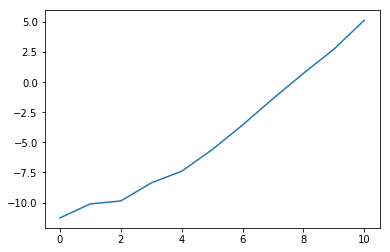

In [547]:
import matplotlib.pyplot as plt
plt.plot(k,np.log2(T))
plt.show

In [541]:
print ("%ds is the total time spend to solve those systems."%(sum(T)*7))

309s is the total time spend to solve those systems.


This line seems to be like a straight line, this is reasonable since  the matrix size is $2^k$ and when we take the log we should get a linear relationship.